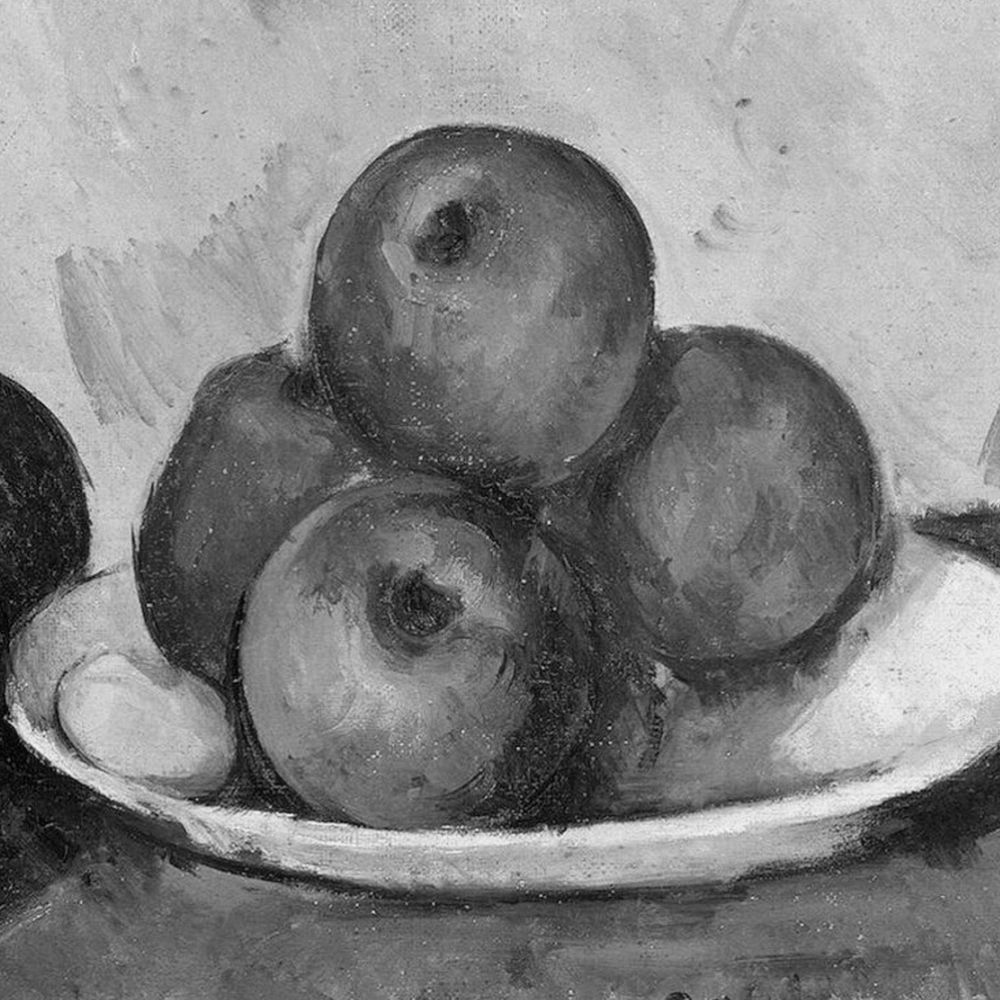

In [2]:
from PIL import Image

im = Image.open('Поль Сезанн. Натюрморт с яблоками.jpg')
width, height = im.size
display(im)

Для лучшей отрисовки можно поробовать превратить картику в черно-белую

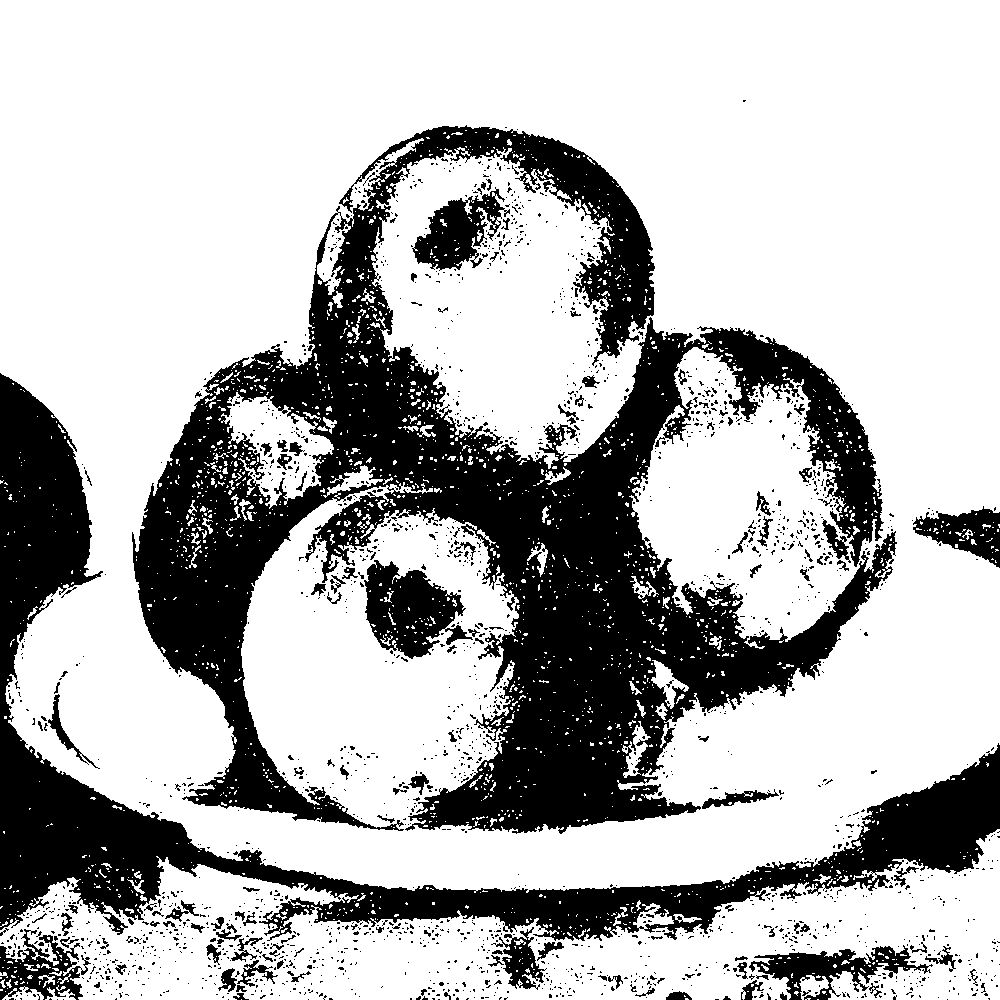

In [ ]:
from skimage.filters import prewitt
import numpy as np
pixels = np.asarray(im) / 255
filtred_pixels = np.array(list(map(lambda vec: np.array(list(map(lambda x:1 if x > 0.36 else 0, vec))), pixels)))
pixels = np.uint8(np.around(filtred_pixels * 255))
new_im = Image.fromarray(pixels, mode='L')
display(new_im)


Сначла попробуем отрисовать просто черный квадрат 

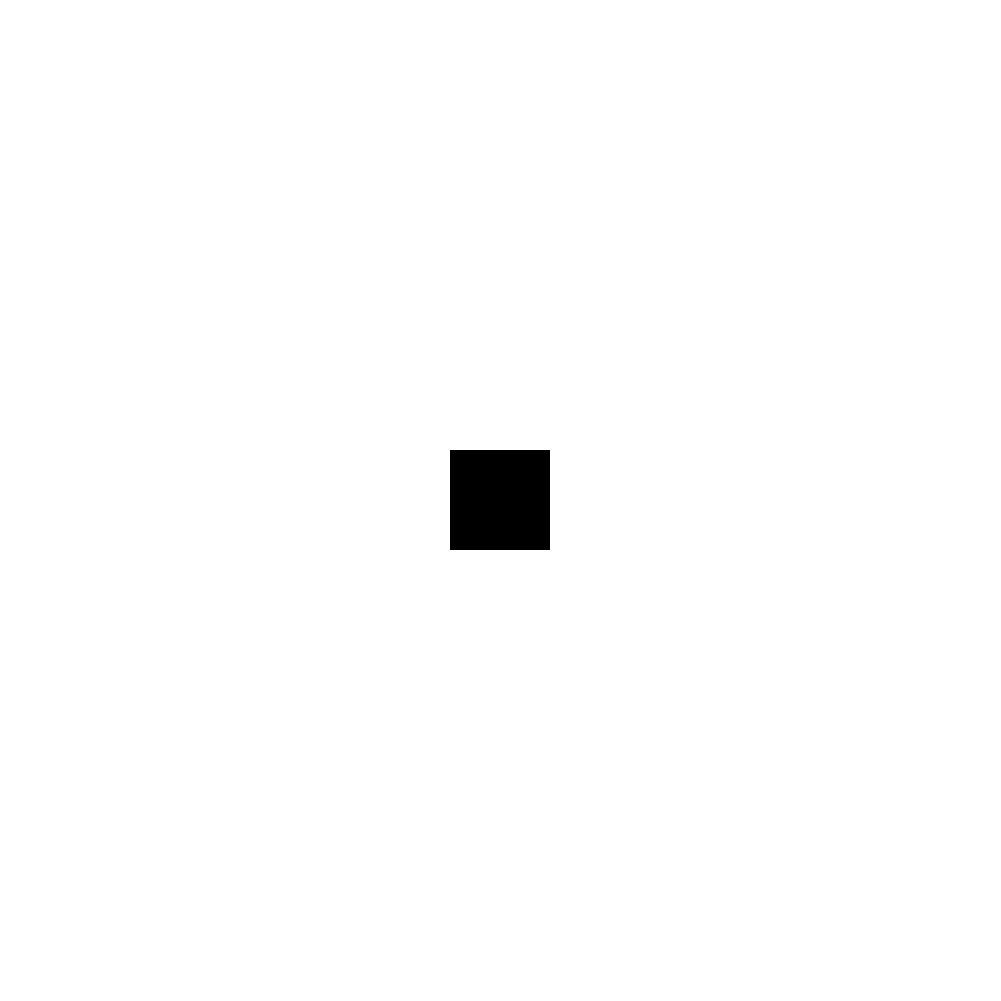

In [ ]:
square_pixels = np.array([np.array([1 for j in range(1001)]) for i in range(1001)])
for i in range(450, 550):
  for j in range(450, 550):
    square_pixels[i][j] = 0

pixels = np.uint8(np.around(square_pixels * 255))
new_im = Image.fromarray(pixels, mode='L')
display(new_im)

Алгоритм будет следующий:  

1. $\sqrt{N}$ раз выбераем рандомные вершины, где N - количество вершин на круге, для рисования.

2. Для каждой вершины выбираем `top` количество нитей, принадлежаших ей, где весовая функция минимальна. Весовая фунуция по дефоту MSE.

3.  После этого, отрисовываем все выбранные наши нити, т.е. "обеляем" нужные нам пиксели на картике

повторяем 1 - 3 `max_iter` раз

Реализация в `thread_draw_algo`

 Протестируем отрисовку квадрата, с помощью предложеного визуализатора



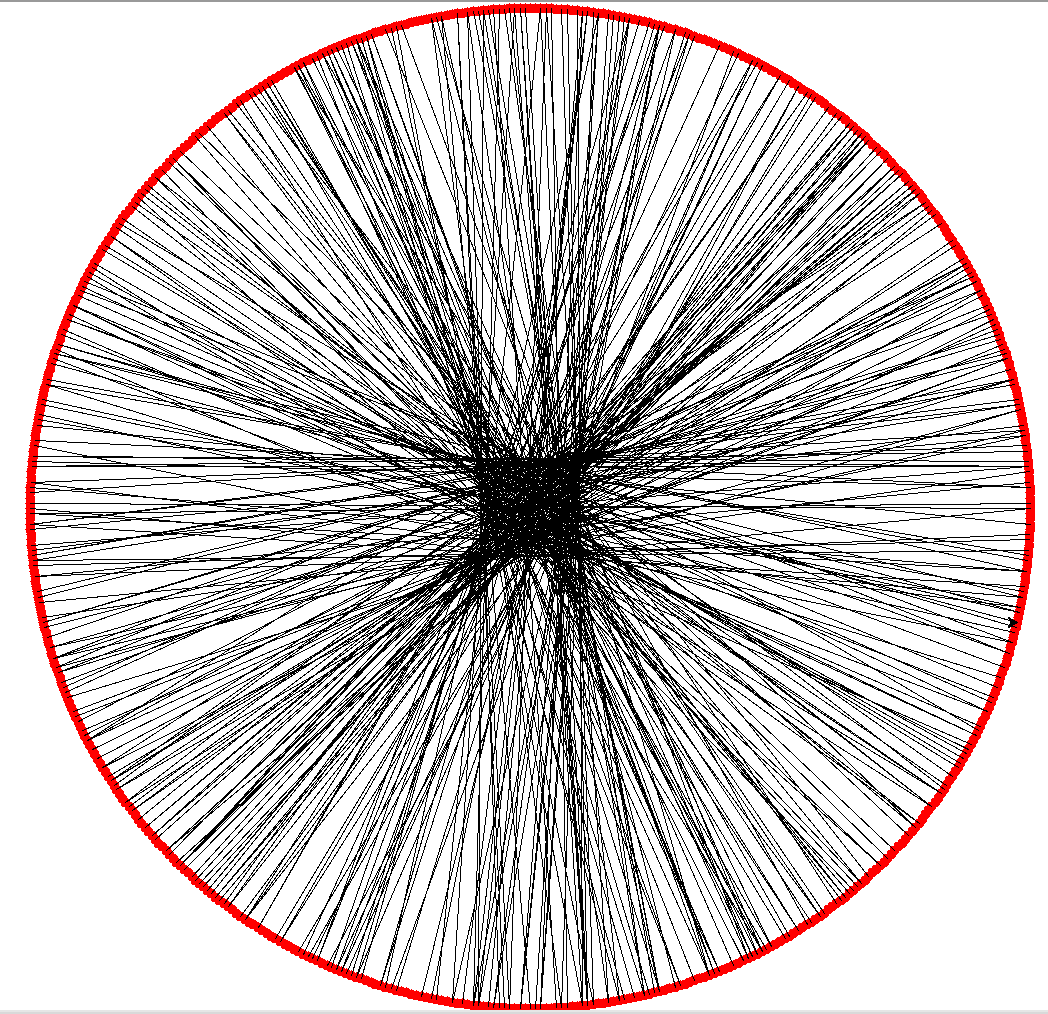

In [3]:
display(Image.open("square.png"))

Я так же сделал свой визуализатор с помощью mathplotlib



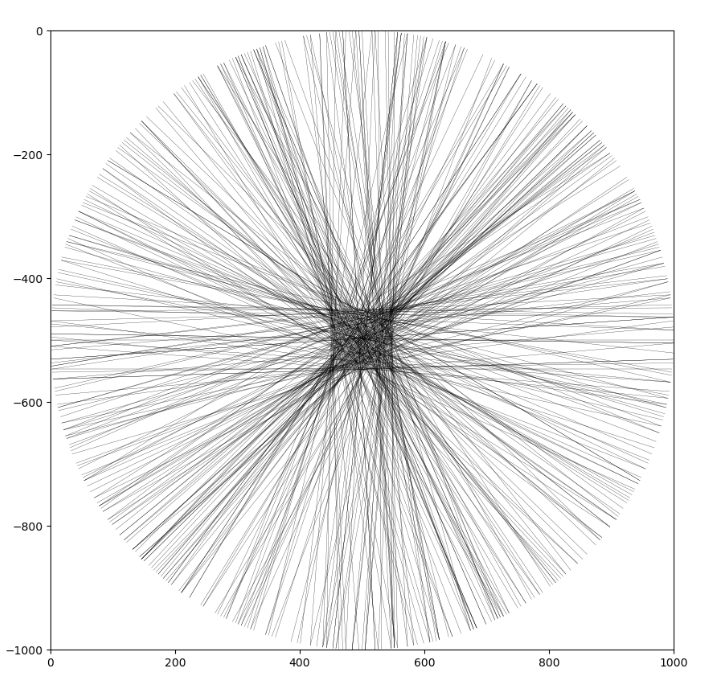

In [4]:
display(Image.open("square2.png"))

 Ну, а теперь отобразим сам натюрморт, используем mathplotlib визуализатор (он получше отобразил)

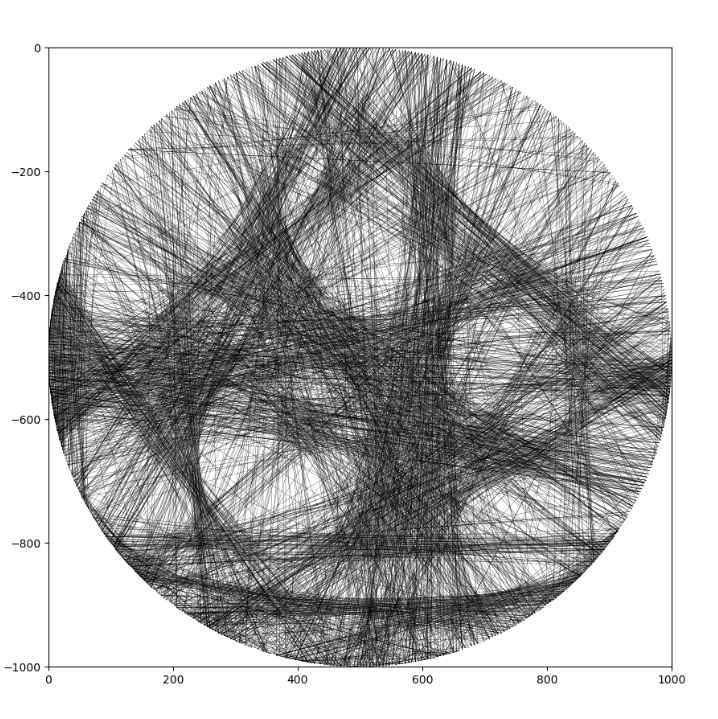

In [6]:
display(Image.open("Result.png"))